In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the California Housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)

In [5]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Feature engineering: One-hot encode median_income
bins = [-np.inf, 1.5, 3, 4.5, 6, np.inf]
labels = [1, 2, 3, 4, 5]
data['median_income_binned'] = pd.cut(data['MedInc'], bins=bins, labels=labels)
data = pd.get_dummies(data, columns=['median_income_binned'], prefix='median_income_bin')
data = data.drop('MedInc', axis=1)  # Drop the original column since it is highly correlated with the new binned variables

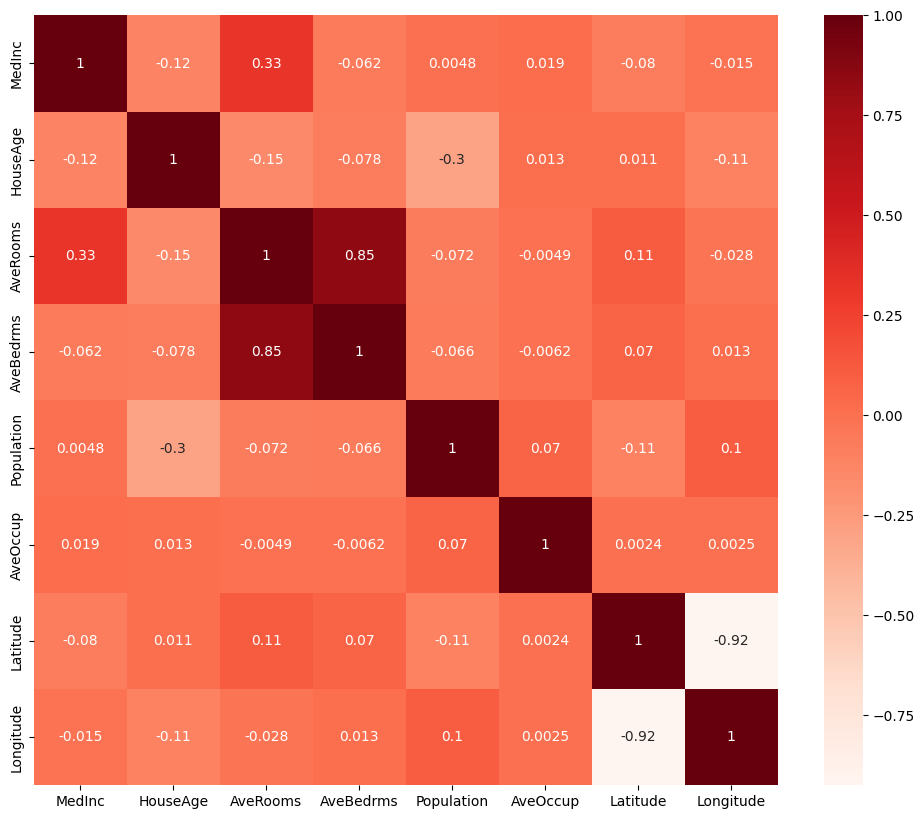

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Split the data into train, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(data, california.target, test_size=0.2, random_state=42)

In [ ]:
# Define the pipelines for each model
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

In [ ]:
# Define the hyperparameters to search over for each model
grid_linear_params = {
    'linear__fit_intercept': [True, False]
}

grid_lasso_params = {
    'lasso__alpha': [0.1, 1, 10],
    'lasso__max_iter': [100, 1000, 10000]
}

grid_ridge_params = {
    'ridge__alpha': [0.1, 1, 10],
    'ridge__max_iter': [100, 1000, 10000]
}

grid_elasticnet_params = {
    'elasticnet__alpha': [0.1, 1, 10],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],
    'elasticnet__max_iter': [100, 1000, 10000]
}

In [ ]:
# Perform hyperparameter tuning with GridSearchCV
grid_search_linear = GridSearchCV(linear_pipeline, grid_linear_params, cv=5, n_jobs=-1)
grid_search_lasso = GridSearchCV(lasso_pipeline, grid_lasso_params, cv=5, n_jobs=-1)
grid_search_ridge = GridSearchCV(ridge_pipeline, grid_ridge_params, cv=5, n_jobs=-1)
grid_search_elasticnet = GridSearchCV(elasticnet_pipeline, grid_elasticnet_params, cv=5, n_jobs=-1)

grid_search_linear.fit(X_trainval, y_trainval)
grid_search_lasso.fit(X_trainval, y_trainval)
grid_search_ridge.fit(X_trainval, y_trainval)
grid_search_elasticnet.fit(X_trainval, y_trainval)

In [ ]:
# Define the hyperparameters to search over for each model
rand_lasso_params = {
    'lasso__alpha': np.arange(0, 10, 0.01),
}

rand_ridge_params = {
    'ridge__alpha': np.arange(0, 10, 0.01),
    'ridge__max_iter': [10, 100, 1000, 10000]
}

rand_elasticnet_params = {
    'elasticnet__alpha': np.arange(0, 10, 0.01),
    'elasticnet__l1_ratio': np.arange(0, 1, 0.01),
    'elasticnet__max_iter': [10, 100, 1000, 10000]
}

In [ ]:
# Perform hyperparameter tuning with RandomizedSearchCV
random_search_lasso = RandomizedSearchCV(lasso_pipeline, rand_lasso_params, cv=5, n_jobs=-1, random_state=42)
random_search_ridge = RandomizedSearchCV(ridge_pipeline, rand_ridge_params, cv=5, n_jobs=-1, random_state=42)
random_search_elasticnet = RandomizedSearchCV(elasticnet_pipeline, rand_elasticnet_params, cv=5, n_jobs=-1, random_state=42)

random_search_lasso.fit(X_trainval, y_trainval)
random_search_ridge.fit(X_trainval, y_trainval)
random_search_elasticnet.fit(X_trainval, y_trainval)

In [ ]:
# Get the best model and its parameters from GridSearchCV
best_model_grid_linear = grid_search_linear.best_estimator_

best_model_lasso = grid_search_lasso.best_estimator_
best_params_lasso = grid_search_lasso.best_params_

best_model_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_

best_model_elasticnet = grid_search_elasticnet.best_estimator_
best_params_elasticnet = grid_search_elasticnet.best_params_

In [ ]:
# Get the best model and its parameters from RandomizedSearchCV
best_model_random_lasso = random_search_lasso.best_estimator_
best_params_random_lasso = random_search_lasso.best_params_

best_model_random_ridge = random_search_ridge.best_estimator_
best_params_random_ridge = random_search_ridge.best_params_

best_model_random_elasticnet = random_search_elasticnet.best_estimator_
best_params_random_elasticnet = random_search_elasticnet.best_params_

In [ ]:
best_model_random_elasticnet

In [ ]:
# Evaluate the models on the test set
y_pred_linear = best_model_grid_linear.predict(X_test)

y_pred_lasso = best_model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

y_pred_ridge = best_model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

y_pred_elasticnet = best_model_elasticnet.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

y_pred_random_lasso = best_model_random_lasso.predict(X_test)
mse_random_lasso = mean_squared_error(y_test, y_pred_random_lasso)
mae_random_lasso = mean_absolute_error(y_test, y_pred_random_lasso)
r2_random_lasso = r2_score(y_test, y_pred_random_lasso)

y_pred_random_ridge = best_model_random_ridge.predict(X_test)
mse_random_ridge = mean_squared_error(y_test, y_pred_random_ridge)
mae_random_ridge = mean_absolute_error(y_test, y_pred_random_ridge)
r2_random_ridge = r2_score(y_test, y_pred_random_ridge)

y_pred_random_elasticnet = best_model_random_elasticnet.predict(X_test)
mse_random_elasticnet = mean_squared_error(y_test, y_pred_random_elasticnet)
mae_random_elasticnet = mean_absolute_error(y_test, y_pred_random_elasticnet)
r2_random_elasticnet = r2_score(y_test, y_pred_random_elasticnet)

In [ ]:
# Print the results
print("Results for best LinearRegression model:")
print("MSE: {:.4f}".format(mean_squared_error(y_test, y_pred_linear)))
print("MAE: {:.4f}".format(mean_absolute_error(y_test, y_pred_linear)))
print("R^2: {:.4f}".format(r2_score(y_test, y_pred_linear)))
print()

print("Results for best Lasso model (GridSearchCV):")
print("MSE: {:.4f}".format(mse_lasso))
print("MAE: {:.4f}".format(mae_lasso))
print("R^2: {:.4f}".format(r2_lasso))
print("Best parameters: {}".format(best_params_lasso))
print()

print("Results for best Ridge model (GridSearchCV):")
print("MSE: {:.4f}".format(mse_ridge))
print("MAE: {:.4f}".format(mae_ridge))
print("R^2: {:.4f}".format(r2_ridge))
print("Best parameters: {}".format(best_params_ridge))
print()

print("Results for best ElasticNet model (GridSearchCV):")
print("MSE: {:.4f}".format(mse_elasticnet))
print("MAE: {:.4f}".format(mae_elasticnet))
print("R^2: {:.4f}".format(r2_elasticnet))
print("Best parameters: {}".format(best_params_elasticnet))
print()

print("Results for best Lasso model (RandomizedSearchCV):")
print("MSE: {:.4f}".format(mse_random_lasso))
print("MAE: {:.4f}".format(mae_random_lasso))
print("R^2: {:.4f}".format(r2_random_lasso))
print("Best parameters: {}".format(best_params_random_lasso))
print()

print("Results for best Ridge model (RandomizedSearchCV):")
print("MSE: {:.4f}".format(mse_random_ridge))
print("MAE: {:.4f}".format(mae_random_ridge))
print("R^2: {:.4f}".format(r2_random_ridge))
print("Best parameters: {}".format(best_params_random_ridge))
print()

print("Results for best ElasticNet model (RandomizedSearchCV):")
print("MSE: {:.4f}".format(mse_random_elasticnet))
print("MAE: {:.4f}".format(mae_random_elasticnet))
print("R^2: {:.4f}".format(r2_random_elasticnet))
print("Best parameters: {}".format(best_params_random_elasticnet))
print()